<a href="https://www.kaggle.com/code/akshayr009/smokedetection?scriptVersionId=105670839" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df=pd.read_csv(r'/kaggle/input/smoke-detection-dataset/smoke_detection_iot.csv')

In [5]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.00,57.36,0,400,12306,18520,939.74,0.00,0.00,0.00,0.00,0.00,0,0
1,1,1654733332,20.02,56.67,0,400,12345,18651,939.74,0.00,0.00,0.00,0.00,0.00,1,0
2,2,1654733333,20.03,55.96,0,400,12374,18764,939.74,0.00,0.00,0.00,0.00,0.00,2,0
3,3,1654733334,20.04,55.28,0,400,12390,18849,939.74,0.00,0.00,0.00,0.00,0.00,3,0
4,4,1654733335,20.06,54.69,0,400,12403,18921,939.74,0.00,0.00,0.00,0.00,0.00,4,0


In [6]:
df.shape

(62630, 16)

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UTC,62630.00,1654792066.18,110002.49,1654712187.00,1654743244.25,1654761919.50,1654777576.75,1655130051.00
Temperature[C],62630.00,15.97,14.36,-22.01,10.99,20.13,25.41,59.93
Humidity[%],62630.00,48.54,8.87,10.74,47.53,50.15,53.24,75.20
TVOC[ppb],62630.00,1942.06,7811.59,0.00,130.00,981.00,1189.00,60000.00
eCO2[ppm],62630.00,670.02,1905.89,400.00,400.00,400.00,438.00,60000.00
Raw H2,62630.00,12942.45,272.46,10668.00,12830.00,12924.00,13109.00,13803.00
Raw Ethanol,62630.00,19754.26,609.51,15317.00,19435.00,19501.00,20078.00,21410.00
Pressure[hPa],62630.00,938.63,1.33,930.85,938.70,938.82,939.42,939.86
PM1.0,62630.00,100.59,922.52,0.00,1.28,1.81,2.09,14333.69
PM2.5,62630.00,184.47,1976.31,0.00,1.34,1.88,2.18,45432.26


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


In [10]:
df.isnull().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [11]:
duplicate_rows = df[df.duplicated()]
print("No. of duplicate rows: ", duplicate_rows.shape[0])

No. of duplicate rows:  0


In [12]:
for col in df.columns:
    print("Column name - ", col)
    print("Mean: {:.2f}".format(df[col].mean()))
    print("Std: {:.2f}".format(df[col].std()))

Column name -  UTC
Mean: 1654792066.18
Std: 110002.49
Column name -  Temperature[C]
Mean: 15.97
Std: 14.36
Column name -  Humidity[%]
Mean: 48.54
Std: 8.87
Column name -  TVOC[ppb]
Mean: 1942.06
Std: 7811.59
Column name -  eCO2[ppm]
Mean: 670.02
Std: 1905.89
Column name -  Raw H2
Mean: 12942.45
Std: 272.46
Column name -  Raw Ethanol
Mean: 19754.26
Std: 609.51
Column name -  Pressure[hPa]
Mean: 938.63
Std: 1.33
Column name -  PM1.0
Mean: 100.59
Std: 922.52
Column name -  PM2.5
Mean: 184.47
Std: 1976.31
Column name -  NC0.5
Mean: 491.46
Std: 4265.66
Column name -  NC1.0
Mean: 203.59
Std: 2214.74
Column name -  NC2.5
Mean: 80.05
Std: 1083.38
Column name -  CNT
Mean: 10511.39
Std: 7597.87
Column name -  Fire Alarm
Mean: 0.71
Std: 0.45


In [13]:
import scipy.stats as stats
def diagnostic_plot(data, col):
    fig = plt.figure(figsize=(20, 5))
    fig.subplots_adjust(right=1.5)
    
    plt.subplot(1, 3, 1)
    sns.distplot(data[col], kde=True, color='pink')
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(data[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(data[col],color='pink')
    plt.title('Box Plot')
    
    plt.show()

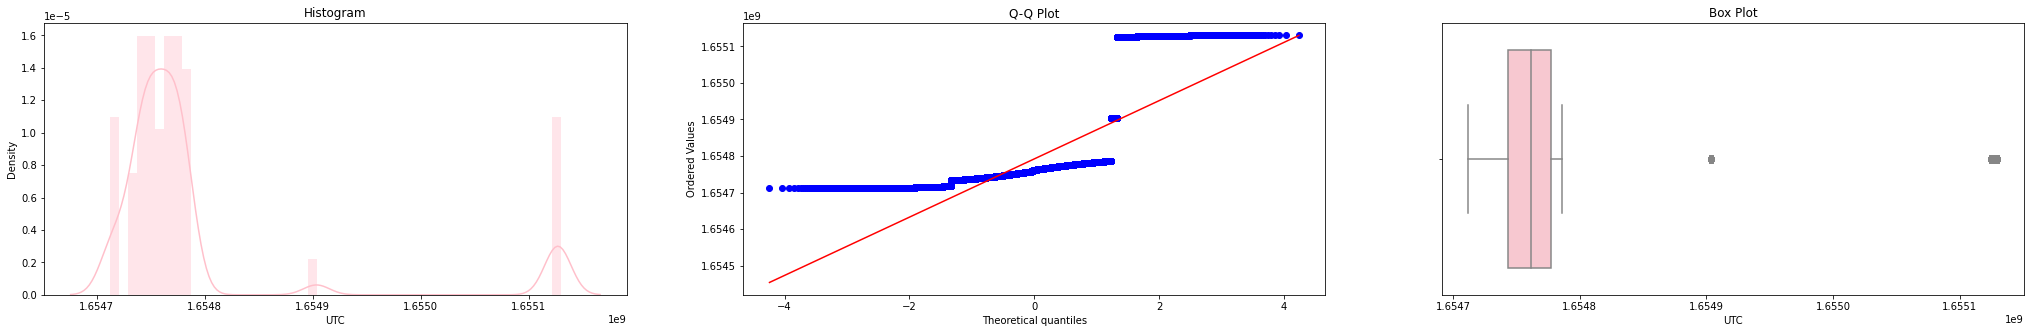

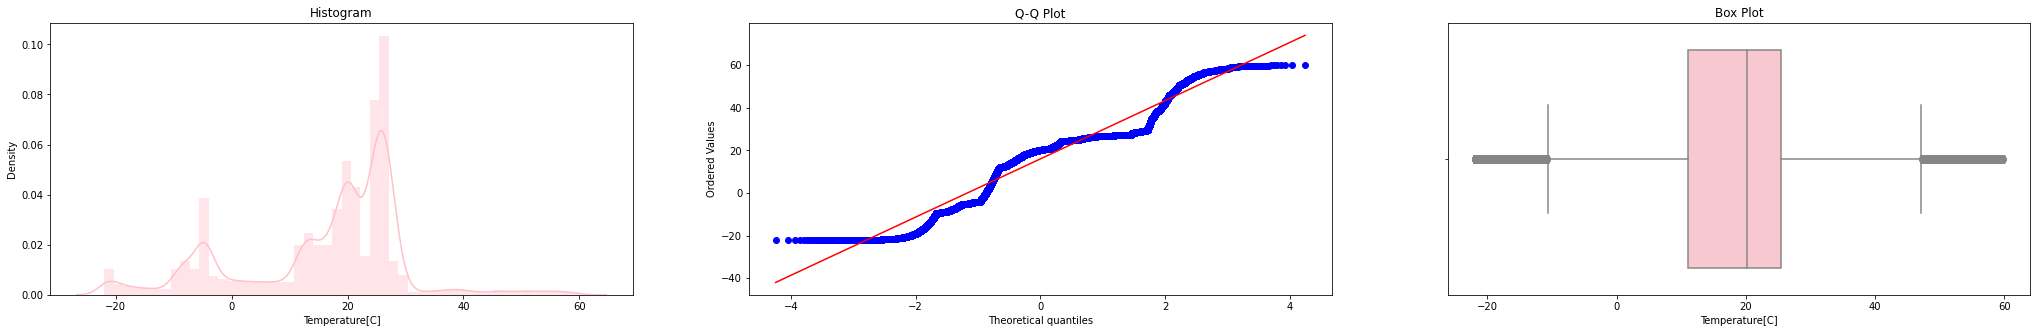

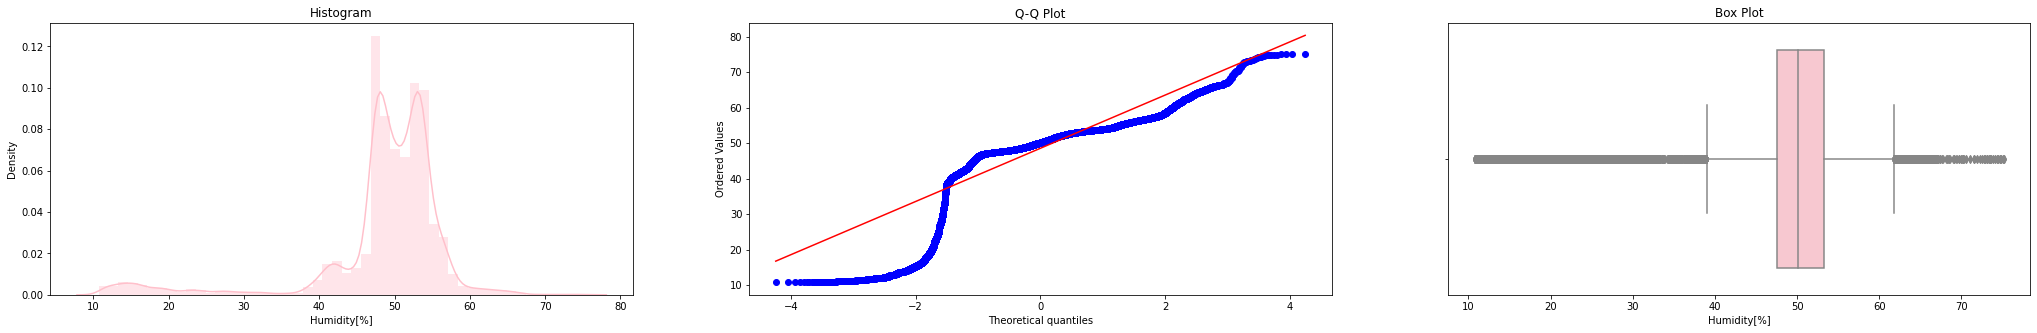

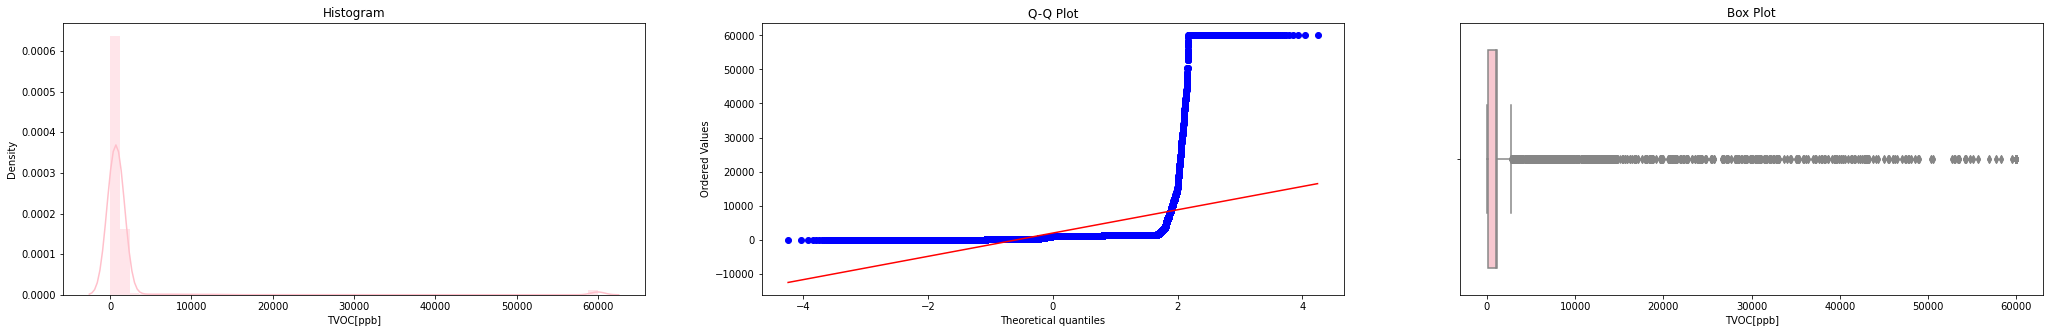

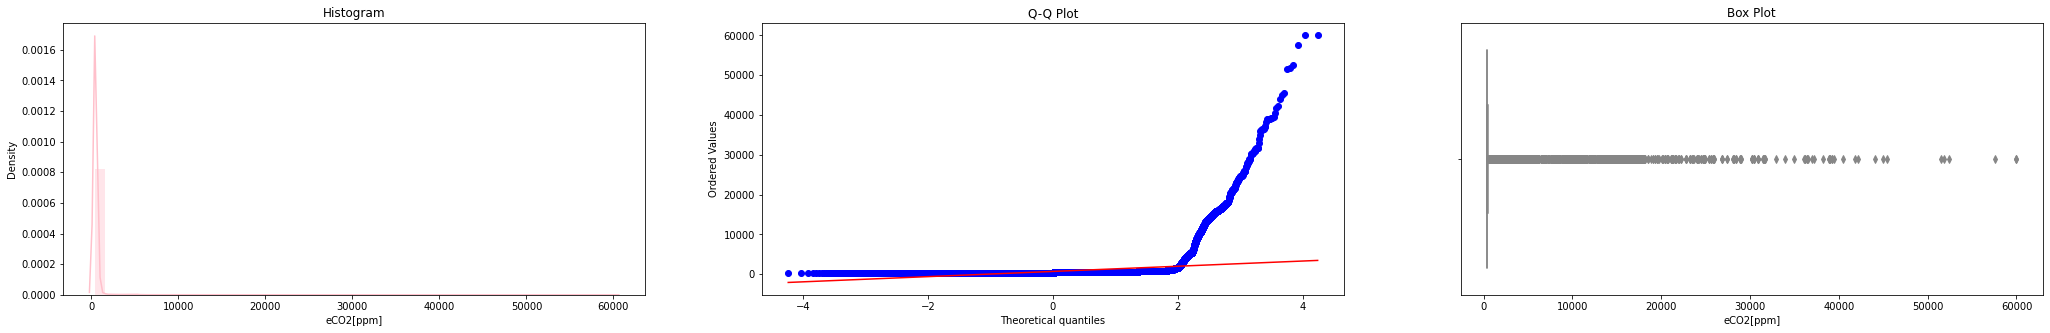

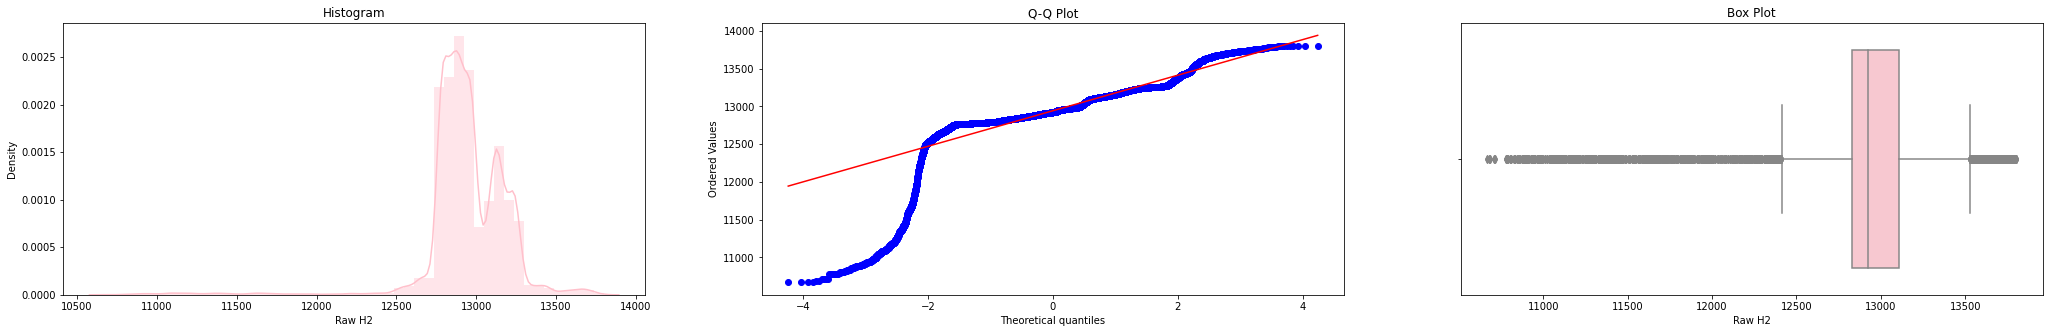

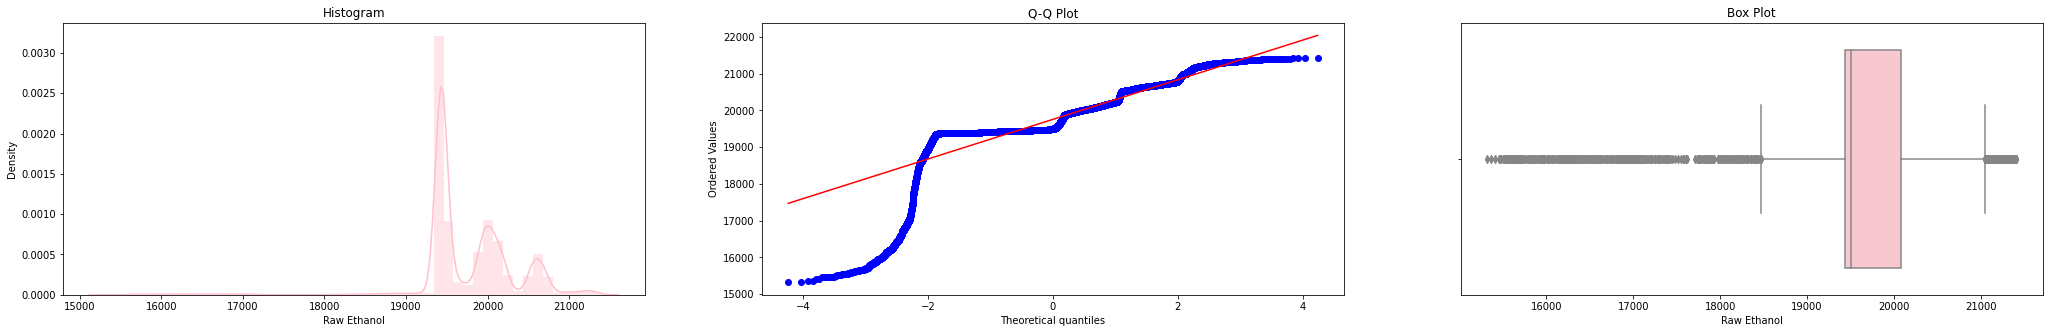

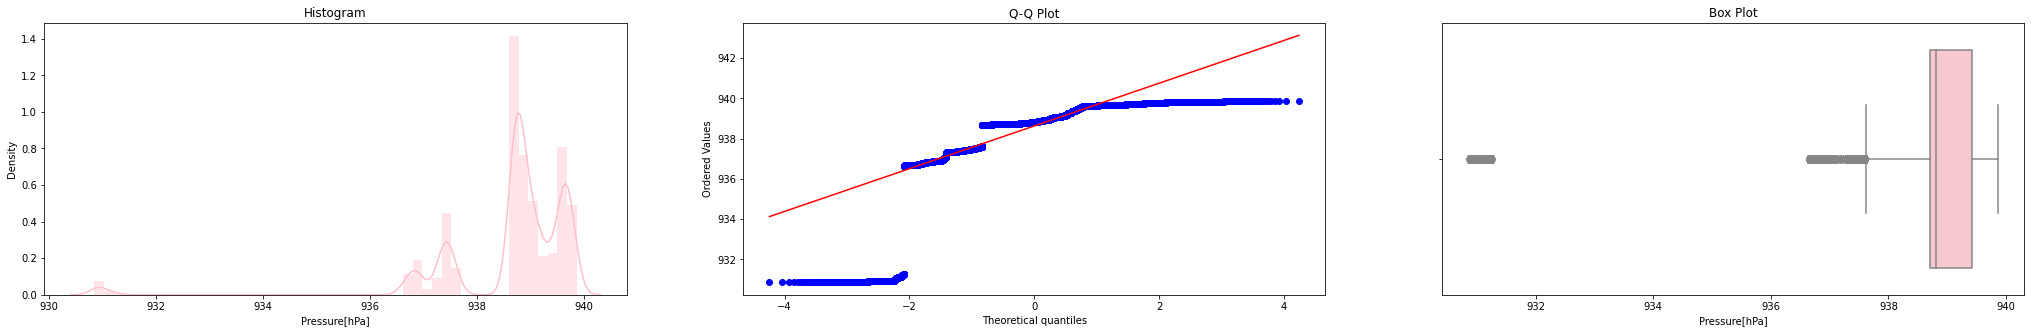

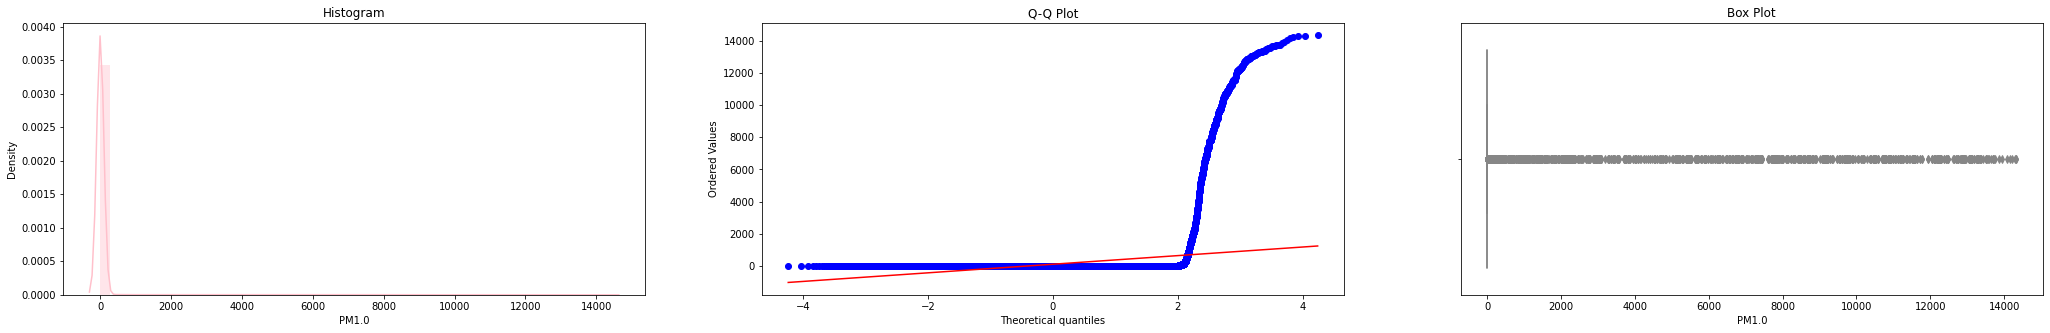

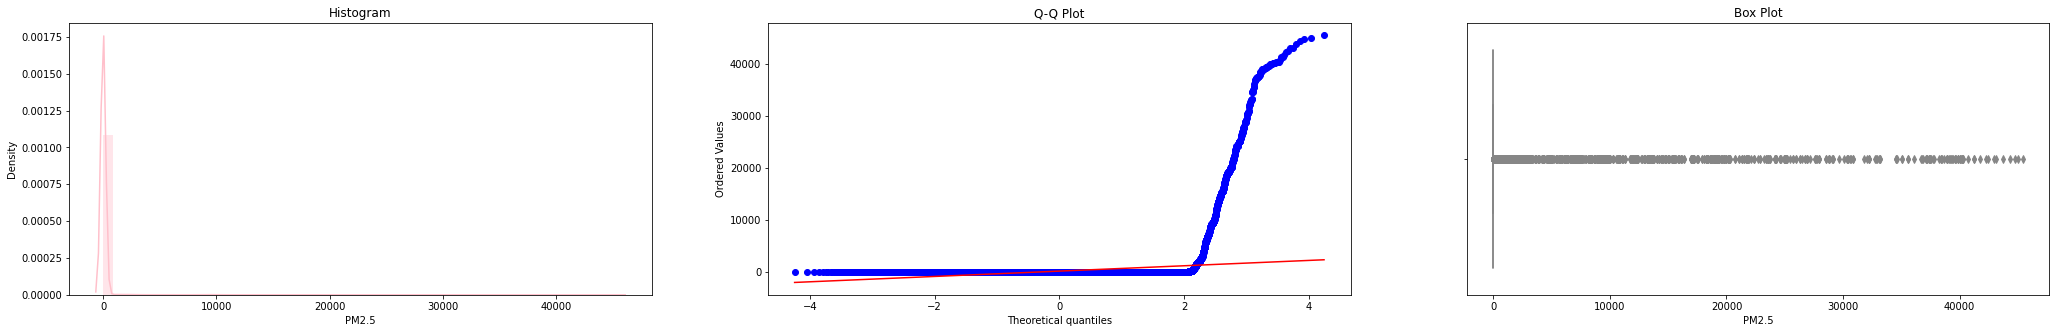

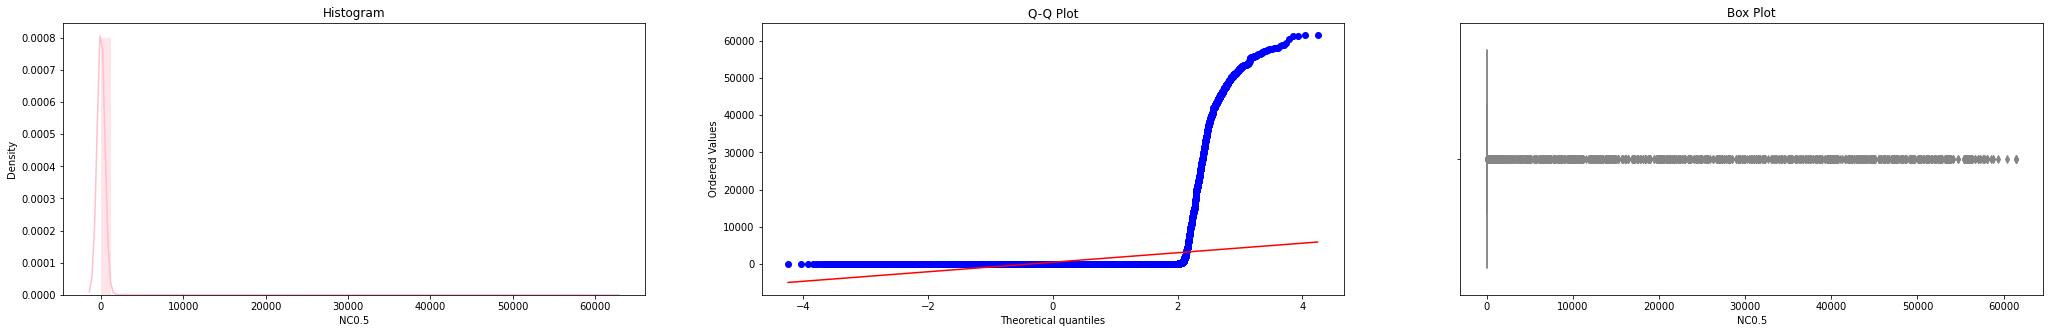

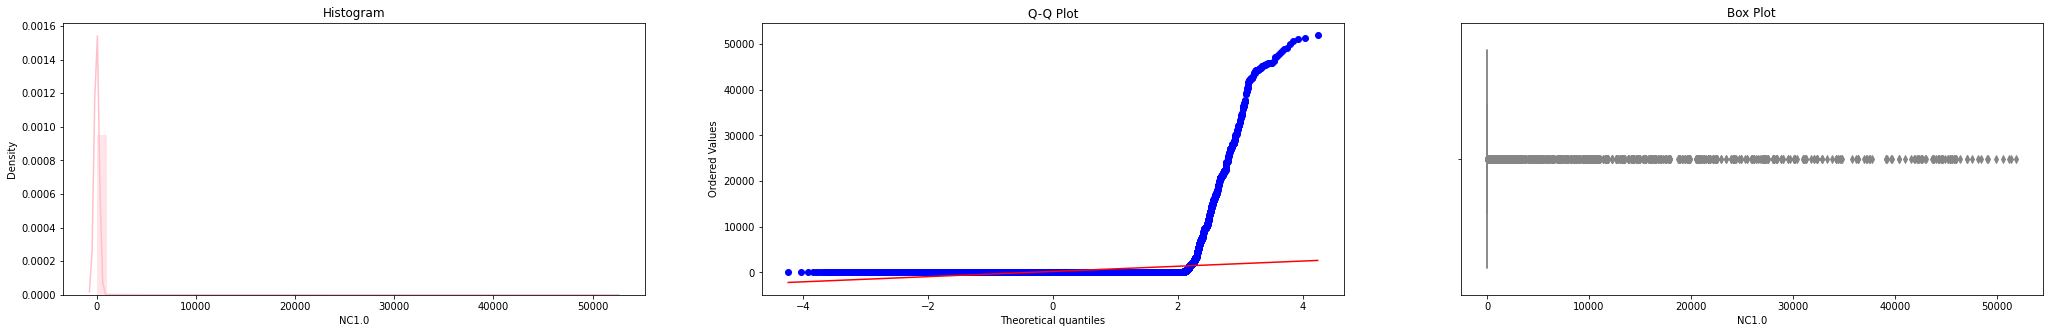

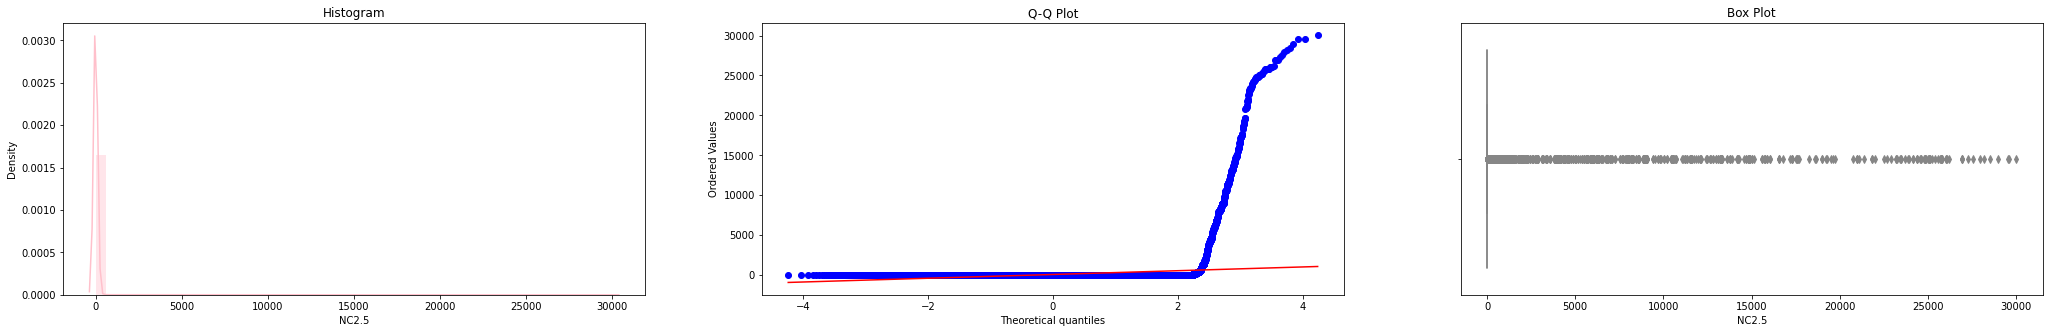

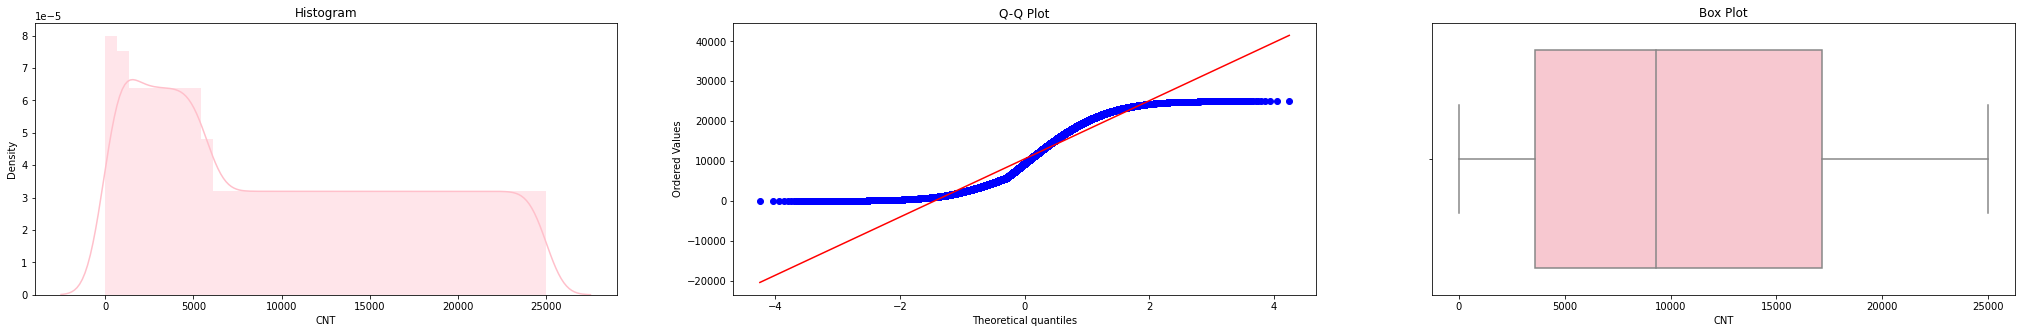

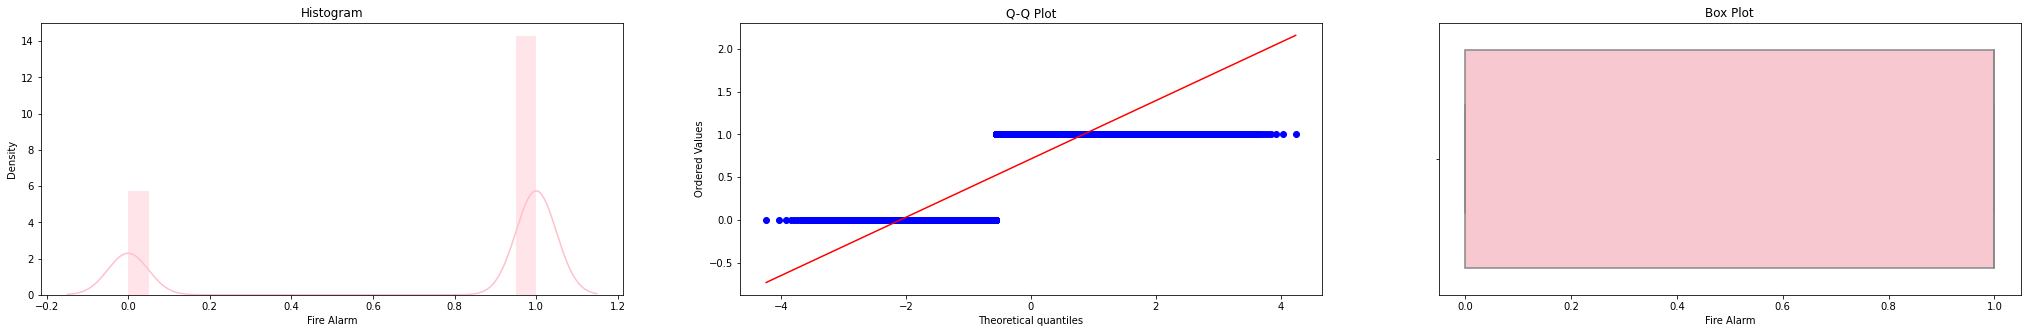

In [14]:
for col in df.columns:
    diagnostic_plot(df, col)

In [15]:
features=[feature for feature in df.columns if feature!='Fire Alarm']

In [16]:
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

UTC              34332.50
Temperature[C]      14.42
Humidity[%]          5.71
TVOC[ppb]         1059.00
eCO2[ppm]           38.00
Raw H2             279.00
Raw Ethanol        643.00
Pressure[hPa]        0.72
PM1.0                0.81
PM2.5                0.84
NC0.5                5.60
NC1.0                0.87
NC2.5                0.02
CNT              13539.50
dtype: float64


In [17]:
df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print("No. of rows remaining: ", df.shape[0])

No. of rows remaining:  35684


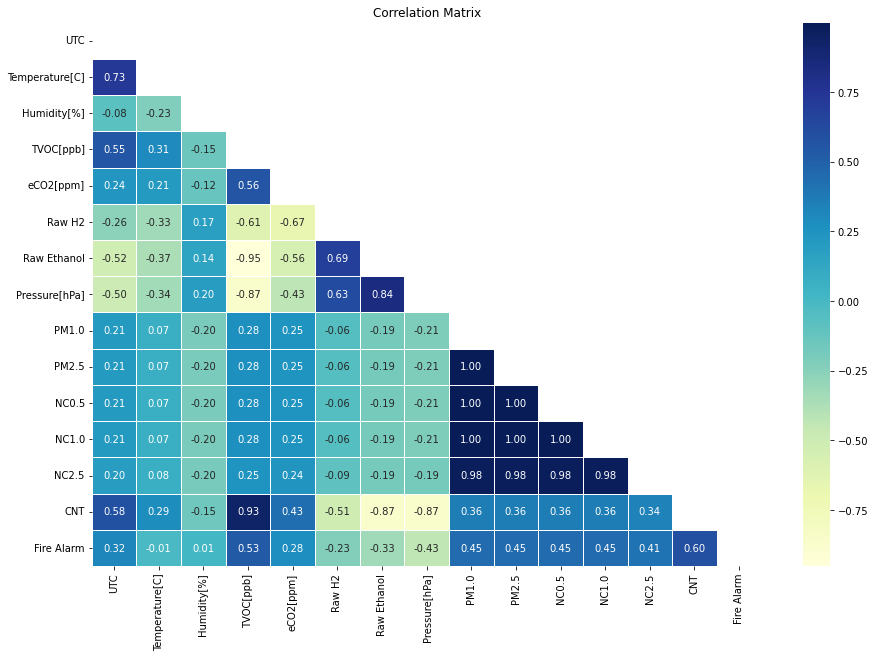

In [18]:
plt.figure(figsize = (15,10))
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

As you can see the feature PM1.0, PM2.5, NO0.5 NC1.0 are highly correlated hence we have to drop some features to avoid multicollinearity

In [19]:
X = df.drop('Fire Alarm', axis=1)
X.corr(method='spearman')

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
UTC,1.00,0.73,-0.08,0.55,0.24,-0.26,-0.52,-0.50,0.21,0.21,0.21,0.21,0.20,0.58
Temperature[C],0.73,1.00,-0.23,0.31,0.21,-0.33,-0.37,-0.34,0.07,0.07,0.07,0.07,0.08,0.29
Humidity[%],-0.08,-0.23,1.00,-0.15,-0.12,0.17,0.14,0.20,-0.20,-0.20,-0.20,-0.20,-0.20,-0.15
TVOC[ppb],0.55,0.31,-0.15,1.00,0.56,-0.61,-0.95,-0.87,0.28,0.28,0.28,0.28,0.25,0.93
eCO2[ppm],0.24,0.21,-0.12,0.56,1.00,-0.67,-0.56,-0.43,0.25,0.25,0.25,0.25,0.24,0.43
Raw H2,-0.26,-0.33,0.17,-0.61,-0.67,1.00,0.69,0.63,-0.06,-0.06,-0.06,-0.06,-0.09,-0.51
Raw Ethanol,-0.52,-0.37,0.14,-0.95,-0.56,0.69,1.00,0.84,-0.19,-0.19,-0.19,-0.19,-0.19,-0.87
Pressure[hPa],-0.50,-0.34,0.20,-0.87,-0.43,0.63,0.84,1.00,-0.21,-0.21,-0.21,-0.21,-0.19,-0.87
PM1.0,0.21,0.07,-0.20,0.28,0.25,-0.06,-0.19,-0.21,1.00,1.00,1.00,1.00,0.98,0.36
PM2.5,0.21,0.07,-0.20,0.28,0.25,-0.06,-0.19,-0.21,1.00,1.00,1.00,1.00,0.98,0.36


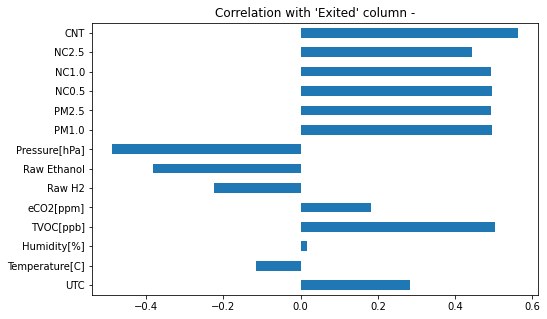

In [20]:
plt.figure(figsize=(8, 5))
X.corrwith(df['Fire Alarm']).plot(kind='barh', title="Correlation with 'Exited' column -")
plt.show()

In [21]:
df.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [22]:
df.drop('NC1.0',axis=1,inplace=True)
df.drop('NC0.5',axis=1,inplace=True)
df.drop('PM2.5',axis=1,inplace=True)

In [23]:
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC2.5,CNT,Fire Alarm
240,1654733571,23.06,51.11,1,400,12626,19698,939.81,0.08,0.06,240,0
247,1654733578,23.13,50.08,5,400,12633,19696,939.81,0.09,0.07,247,0
248,1654733579,23.14,50.00,0,400,12629,19704,939.79,0.10,0.07,248,0
249,1654733580,23.15,49.85,12,400,12630,19698,939.79,0.10,0.07,249,0
250,1654733581,23.16,49.71,11,400,12637,19710,939.81,0.10,0.07,250,0


In [24]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_scaled=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_scaled.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC2.5,CNT,Fire Alarm
0,0.29,0.85,0.48,0.00,0.00,0.02,0.24,0.98,0.00,0.70,0.01,0.00
1,0.29,0.85,0.43,0.00,0.00,0.03,0.24,0.98,0.01,0.96,0.01,0.00
2,0.29,0.85,0.42,0.00,0.00,0.02,0.24,0.97,0.01,0.93,0.01,0.00
3,0.29,0.85,0.42,0.01,0.00,0.03,0.24,0.97,0.01,0.96,0.01,0.00
4,0.29,0.85,0.41,0.01,0.00,0.03,0.25,0.98,0.01,0.94,0.01,0.00


In [25]:
x=df.iloc[:,:-1]

In [26]:
x

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC2.5,CNT
240,1654733571,23.06,51.11,1,400,12626,19698,939.81,0.08,0.06,240
247,1654733578,23.13,50.08,5,400,12633,19696,939.81,0.09,0.07,247
248,1654733579,23.14,50.00,0,400,12629,19704,939.79,0.10,0.07,248
249,1654733580,23.15,49.85,12,400,12630,19698,939.79,0.10,0.07,249
250,1654733581,23.16,49.71,11,400,12637,19710,939.81,0.10,0.07,250
...,...,...,...,...,...,...,...,...,...,...,...
51223,1654712268,26.84,44.99,17,415,12863,20774,937.63,2.18,0.05,81
51224,1654712269,26.81,45.00,27,426,12853,20763,937.63,2.18,0.05,82
51225,1654712270,28.25,45.00,7,414,12870,20795,937.62,2.17,0.05,83
51227,1654712272,28.91,42.89,31,415,12871,20756,937.62,2.15,0.05,85


In [27]:
y=df.iloc[:,-1:]

In [28]:
y

,Fire Alarm
240,0
247,0
248,0
249,0
250,0
...,...
51223,0
51224,0
51225,0
51227,0


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [30]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (26763, 11)
X_test: (8921, 11)
Y_train: (26763, 1)
Y_test: (8921, 1)


## Using Logistics Regression

In [31]:
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)

LogisticRegression()

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
parameters={'penalty':['l1','l2','elasticnet'],"C":[0.5,0.01,1,2,3,4,5],'max_iter':[1,2,3,4,5,10,50]}

In [34]:
gridcv=GridSearchCV(modelLogistic,param_grid=parameters,scoring='accuracy',cv=10)

In [35]:
gridcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 0.01, 1, 2, 3, 4, 5],
                         'max_iter': [1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [36]:
print(gridcv.best_params_)

{'C': 0.5, 'max_iter': 1, 'penalty': 'l2'}


In [37]:
y_predlr=gridcv.predict(x_test)

In [38]:
print("Train accuracy :{:.2f}".format(accuracy_score(y_train, gridcv.predict(x_train))))
print("Test accuracy :{:.2f}".format(accuracy_score(y_test, gridcv.predict(x_test))))

Train accuracy :0.86
Test accuracy :0.87


In [39]:
lrtrain=accuracy_score(y_train, gridcv.predict(x_train))
lrtest=accuracy_score(y_test, gridcv.predict(x_test))

In [40]:
print(classification_report(y_predlr,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.87      0.93      8921

    accuracy                           0.87      8921
   macro avg       0.50      0.43      0.46      8921
weighted avg       1.00      0.87      0.93      8921



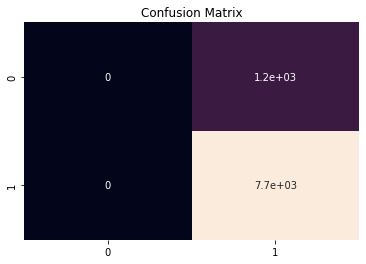

In [41]:
conmat = confusion_matrix(y_test, y_predlr)
sns.heatmap(conmat, annot=True, cbar=False)
plt.title("Confusion Matrix")
plt.show()

## Using KNN Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [43]:
parameter={"n_neighbors":[10,20,50,100,200]}

In [44]:
from sklearn.model_selection import GridSearchCV
knncv=GridSearchCV(knn,parameter,scoring='neg_mean_squared_error',cv=5)
knncv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 20, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [45]:
print(knncv.best_params_)

{'n_neighbors': 50}


In [46]:
y_predknn=knncv.predict(x_test)

In [47]:
print("Train accuracy :{:.2f}".format(accuracy_score(y_train, knncv.predict(x_train))))
print("Test accuracy :{:.2f}".format(accuracy_score(y_test, knncv.predict(x_test))))

Train accuracy :1.00
Test accuracy :1.00


In [48]:
knntrain=accuracy_score(y_train, knncv.predict(x_train))
knntest=accuracy_score(y_test, knncv.predict(x_test))

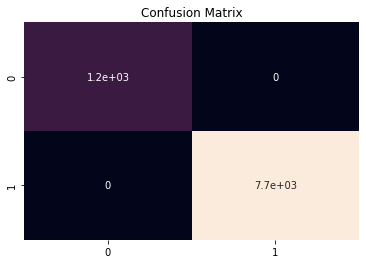

In [49]:
conmat = confusion_matrix(y_test, y_predknn)
sns.heatmap(conmat, annot=True, cbar=False)
plt.title("Confusion Matrix")
plt.show()

## Using Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
treemodel=DecisionTreeClassifier()

In [52]:
## preprunning
parameter={
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[1,2,3,4,5]
}

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
cv=GridSearchCV(treemodel,parameter,scoring='accuracy',cv=5)

In [55]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [56]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [57]:
y_predtree=cv.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score,classification_report

In [59]:
print("Train accuracy :{:.2f}".format(accuracy_score(y_train, cv.predict(x_train))))
print("Test accuracy :{:.2f}".format(accuracy_score(y_test, cv.predict(x_test))))

Train accuracy :1.00
Test accuracy :1.00


In [60]:
dttrain=accuracy_score(y_train, cv.predict(x_train))
dttest=accuracy_score(y_test, cv.predict(x_test))

In [61]:
print(classification_report(y_predtree,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1204
           1       1.00      1.00      1.00      7717

    accuracy                           1.00      8921
   macro avg       1.00      1.00      1.00      8921
weighted avg       1.00      1.00      1.00      8921



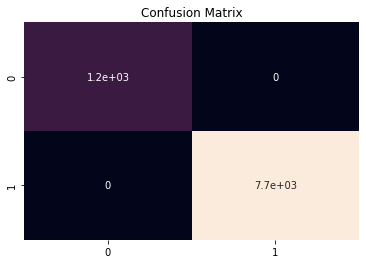

In [62]:
conmat = confusion_matrix(y_test, y_predtree)
sns.heatmap(conmat, annot=True, cbar=False)
plt.title("Confusion Matrix")
plt.show()

In [63]:
y=[lrtrain,knntrain,dttrain]
x=[lrtest,knntest,dttrain]

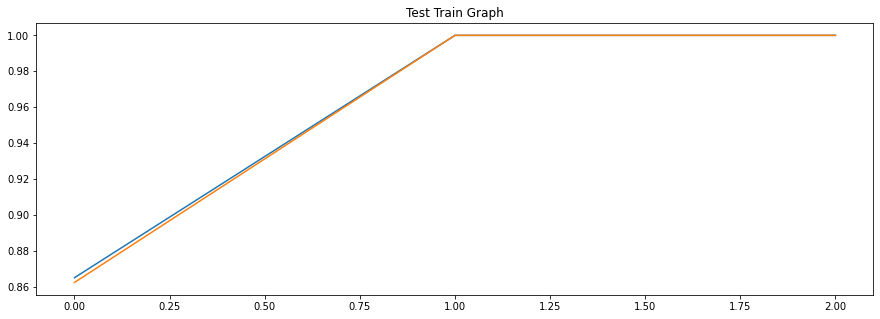

In [64]:
plt.figure(figsize=(15, 5))
plt.title('Test Train Graph')
plt.plot(x)
plt.plot(y)
plt.show()

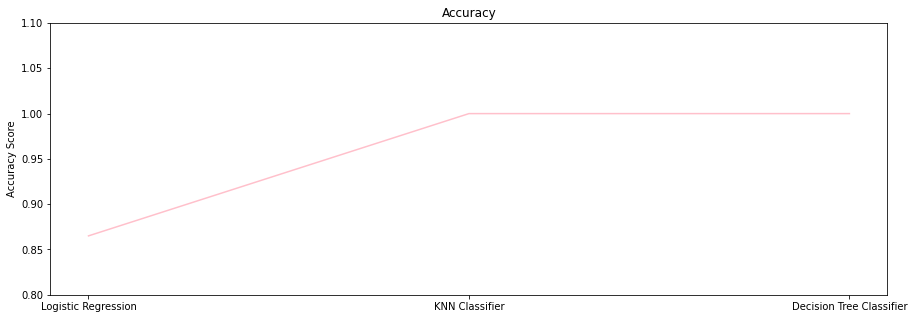

In [65]:
plt.figure(figsize=(15, 5))
plt.title('Accuracy')
models = ['Logistic Regression', 'KNN Classifier','Decision Tree Classifier']
test_accuracy = [lrtest, knntest, dttest]
plt.plot(models, test_accuracy, color='pink')
plt.ylim(0.80, 1.1)
plt.ylabel("Accuracy Score")
plt.show()